# import packages

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sys
%matplotlib inline

In [172]:
# read data
data=pd.read_csv("/kaggle/input/risk-dataset/train.csv")

In [173]:
data.head() # show first 5 row

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [174]:
data.shape # (number of rows , number of columns)

(29165, 20)

In [175]:
data.describe() # for numerical columns

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [177]:
data.isna().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [178]:
data.shape

(29165, 20)

In [179]:
data.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [180]:
# remove columns unnecessary
data.drop(["ID","Has a phone","Job title"],axis=1,inplace=True)

In [181]:
data.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has an email,Family member count,Account age,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,2.0,-17.0,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,2.0,-1.0,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,4.0,-38.0,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,1,1.0,-11.0,0
4,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,0,1.0,-41.0,0


In [182]:
data.shape

(29165, 17)

In [183]:
data["Employment status"].value_counts()

Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: count, dtype: int64

In [184]:
data["Education level"].value_counts()

Education level
Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: count, dtype: int64

In [185]:
data["Marital status"].value_counts()

Marital status
Married                 20044
Single / not married     3864
Civil marriage           2312
Separated                1712
Widow                    1233
Name: count, dtype: int64

In [186]:
# remove columns unnecessary
data.drop(["Has a mobile phone"],axis=1,inplace=True)

In [187]:
data.drop_duplicates(inplace=True)

In [188]:
data.shape

(26379, 16)

In [189]:
numerical_features=data.select_dtypes(include=["number"])

In [190]:
print(numerical_features)

       Children count    Income    Age  Employment length  Has a work phone  \
0                   0  135000.0 -16271              -3111                 0   
1                   1  135000.0 -10130              -1651                 0   
2                   2  180000.0 -12821              -5657                 0   
3                   0  360000.0 -20929              -2046                 0   
4                   0  270000.0 -16207               -515                 0   
...               ...       ...    ...                ...               ...   
29159               0  135000.0 -11088              -1447                 0   
29161               1  135000.0 -15532              -8256                 0   
29162               0   76500.0 -17782              -3291                 1   
29163               0  157500.0 -21635             365243                 0   
29164               0  585000.0 -18858              -2010                 0   

       Has an email  Family member count  Account a

In [191]:
categorical_features=data.select_dtypes(include=["object"])

In [192]:
print(categorical_features)

      Gender Has a car Has a property     Employment status  \
0          M         Y              Y               Working   
1          F         Y              N  Commercial associate   
2          F         N              Y  Commercial associate   
3          F         Y              Y  Commercial associate   
4          F         N              N               Working   
...      ...       ...            ...                   ...   
29159      F         N              Y  Commercial associate   
29161      F         N              Y  Commercial associate   
29162      F         N              Y               Working   
29163      F         N              Y             Pensioner   
29164      F         N              Y  Commercial associate   

                     Education level        Marital status           Dwelling  
0      Secondary / secondary special               Married       With parents  
1                   Higher education  Single / not married  House / apartment  
2  

In [193]:
categorical_features.columns

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling'],
      dtype='object')

In [194]:
cat_columns=['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling']

In [195]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_columns:
    data[col]=le.fit_transform(data[col])

In [28]:
data.head()


,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has an email,Family member count,Account age,Is high risk
0,1,1,1,0,135000.0,4,4,1,5,-16271,-3111,0,0,2.0,-17.0,0
1,0,1,0,1,135000.0,0,1,3,1,-10130,-1651,0,0,2.0,-1.0,0
2,0,0,1,2,180000.0,0,4,1,1,-12821,-5657,0,0,4.0,-38.0,0
3,0,1,1,0,360000.0,0,1,3,1,-20929,-2046,0,1,1.0,-11.0,0
4,0,0,0,0,270000.0,4,4,2,1,-16207,-515,0,0,1.0,-41.0,0


In [29]:
data.shape

(26379, 16)

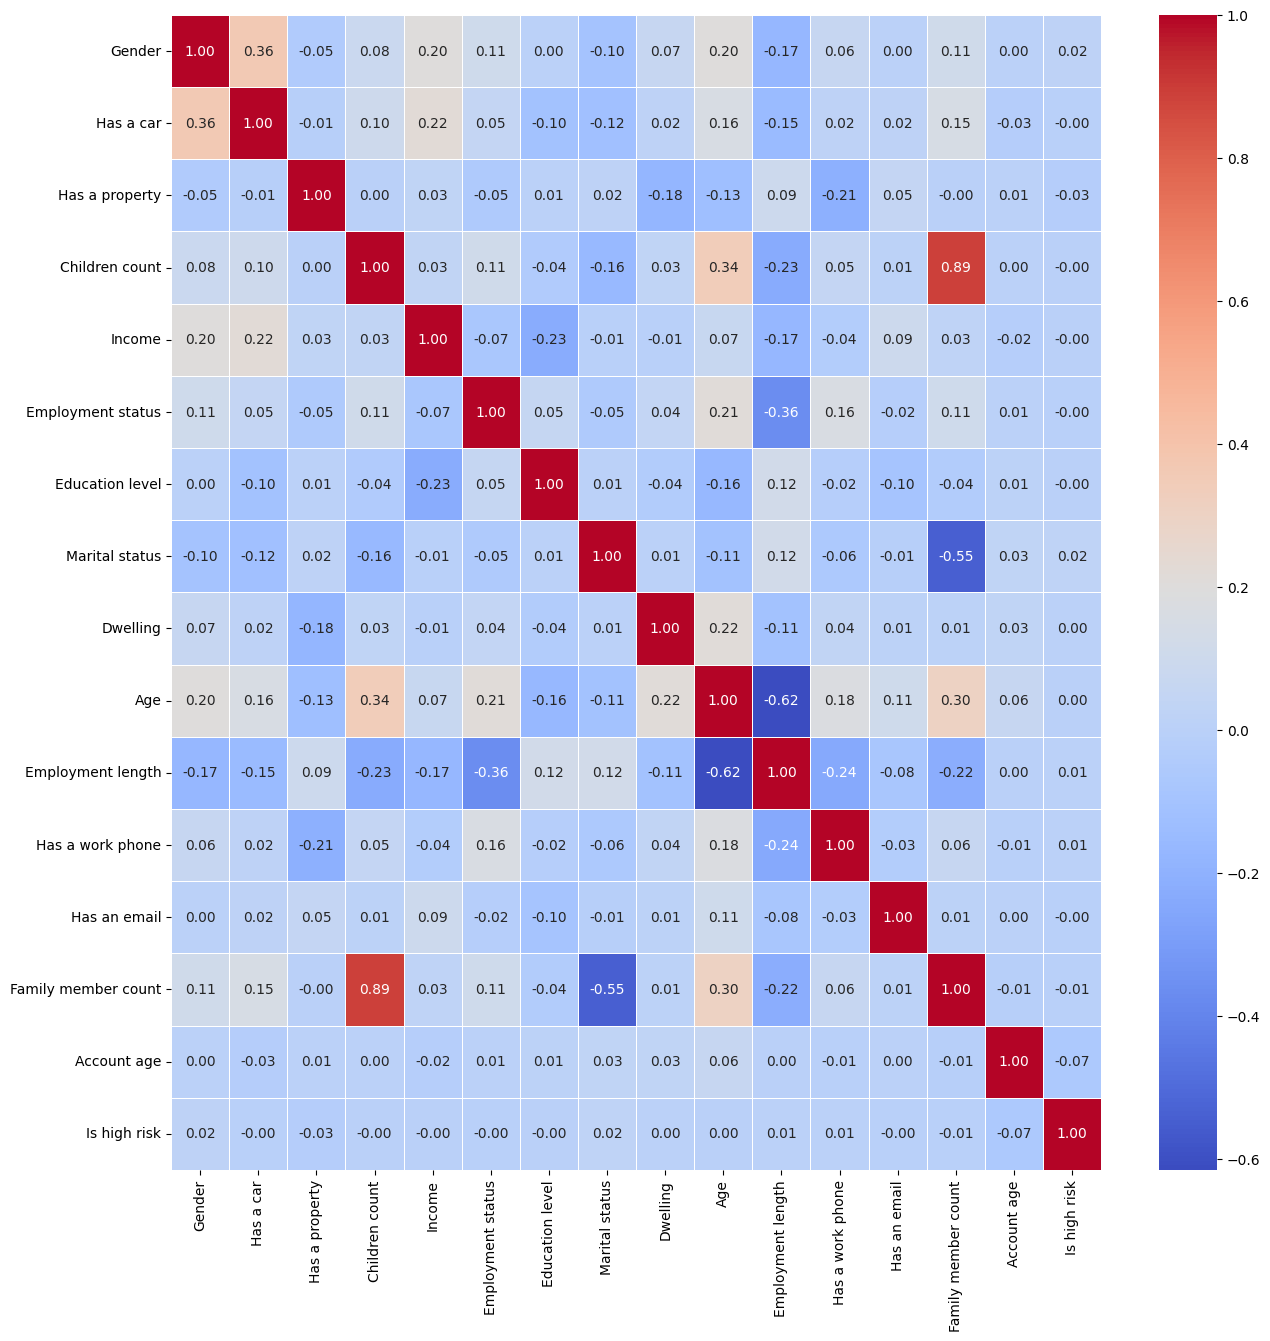

In [30]:
corr=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [196]:
data.drop(["Family member count"],axis=1,inplace=True)

In [197]:
numerical_features.columns

Index(['Children count', 'Income', 'Age', 'Employment length',
       'Has a work phone', 'Has an email', 'Family member count',
       'Account age', 'Is high risk'],
      dtype='object')

In [198]:
num_features=['Children count', 'Income', 'Age', 'Employment length',
       'Has a work phone', 'Has an email',
       'Account age', 'Is high risk']

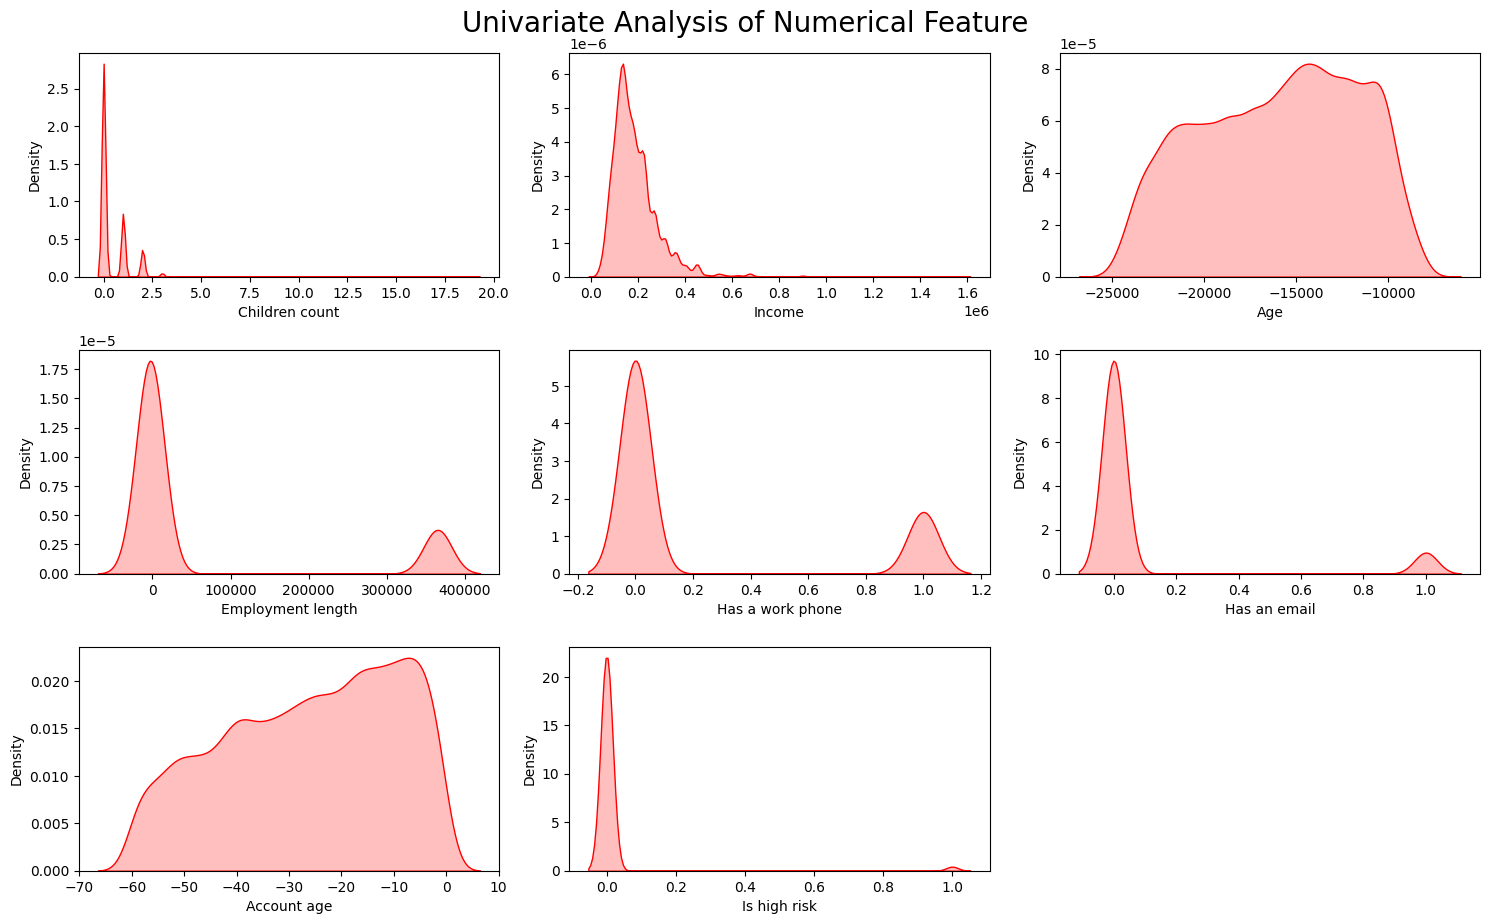

In [34]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Feature",fontsize=20,fontweight=20)
for i in range(0,len(num_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=data[num_features[i]],shade=True,color="r")
    plt.xlabel(num_features[i])
    plt.tight_layout()

<Axes: xlabel='Is high risk', ylabel='count'>

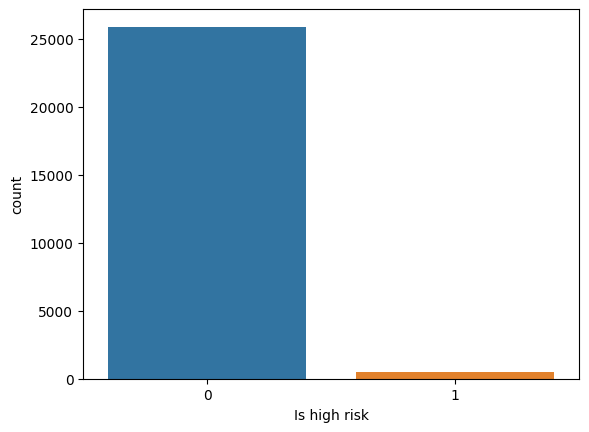

In [35]:
sns.countplot(data,x=data["Is high risk"])

<Axes: >

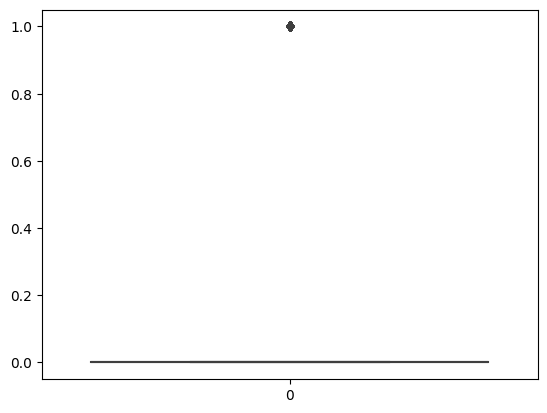

In [36]:
sns.boxplot(data["Is high risk"])

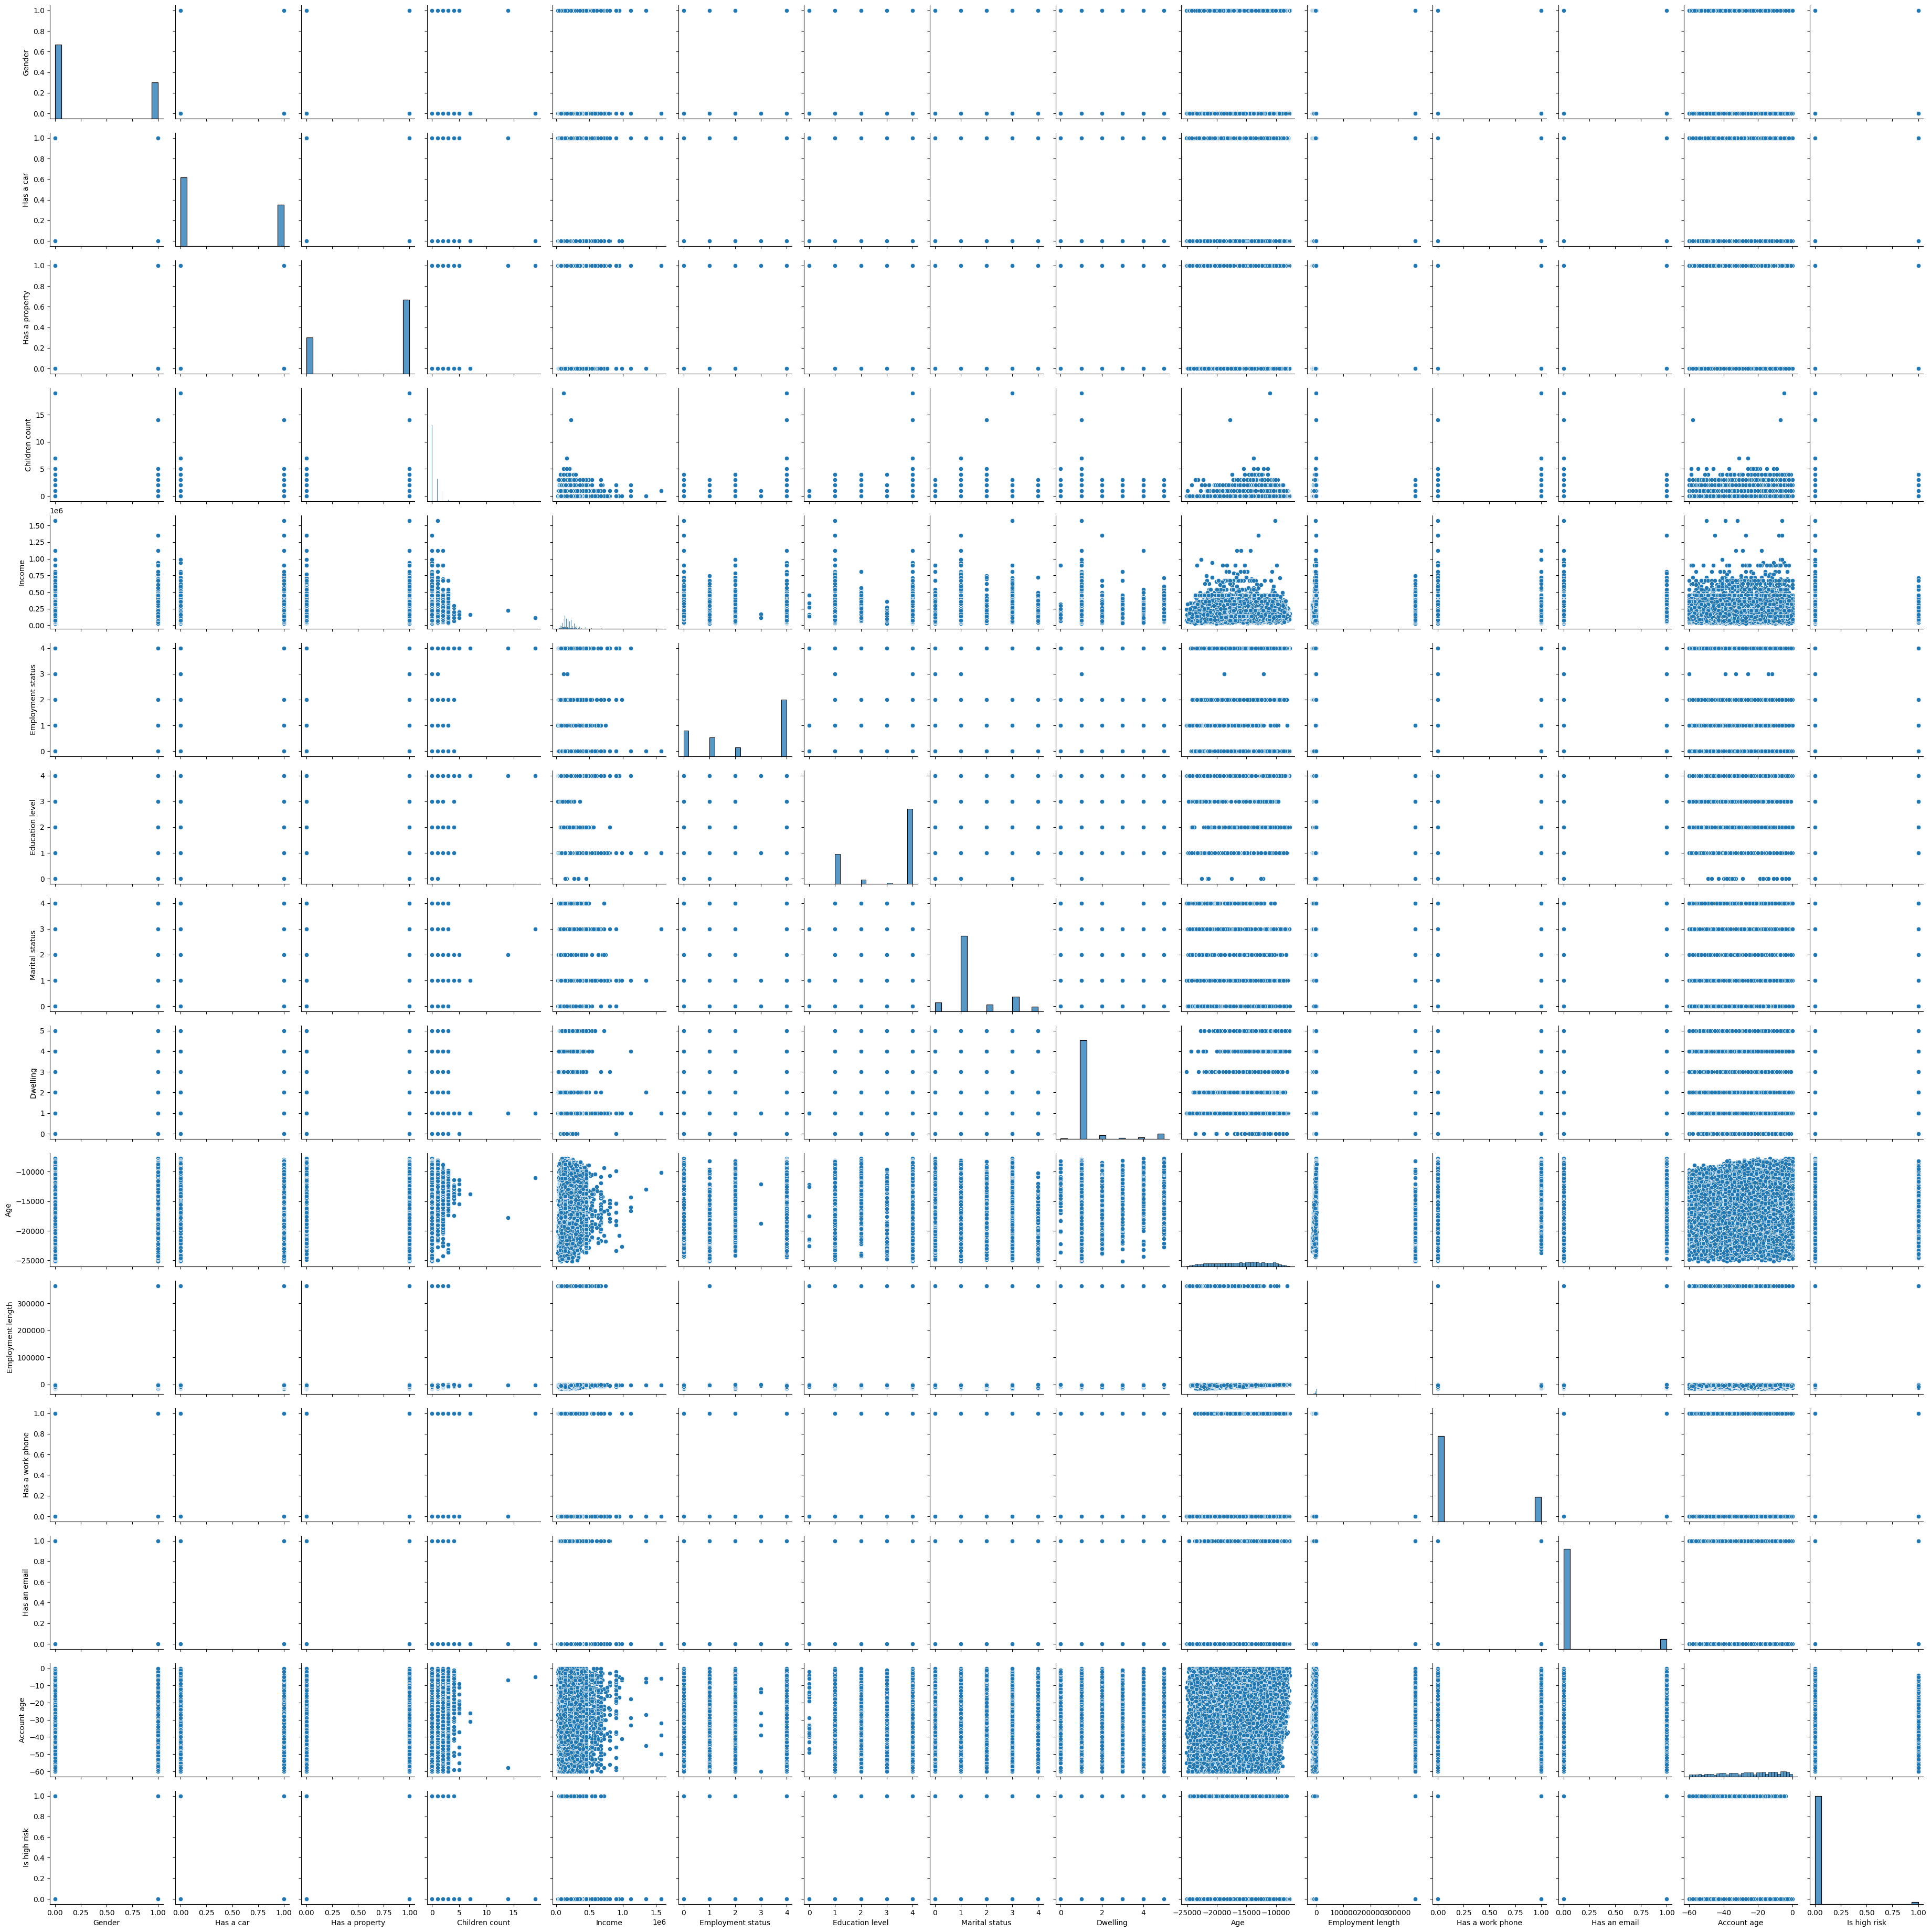

In [37]:
sns.pairplot(data)
plt.show()

In [38]:
data.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has an email,Account age,Is high risk
0,1,1,1,0,135000.0,4,4,1,5,-16271,-3111,0,0,-17.0,0
1,0,1,0,1,135000.0,0,1,3,1,-10130,-1651,0,0,-1.0,0
2,0,0,1,2,180000.0,0,4,1,1,-12821,-5657,0,0,-38.0,0
3,0,1,1,0,360000.0,0,1,3,1,-20929,-2046,0,1,-11.0,0
4,0,0,0,0,270000.0,4,4,2,1,-16207,-515,0,0,-41.0,0


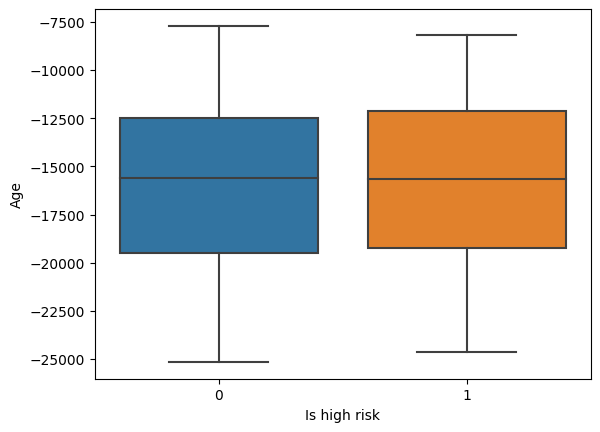

In [39]:
sns.boxplot(x="Is high risk",y="Age",data=data)
plt.show()

<Axes: >

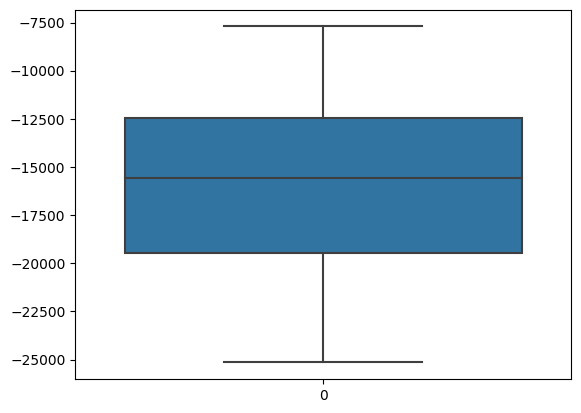

In [40]:
sns.boxplot(data["Age"])

<Axes: xlabel='Employment length'>

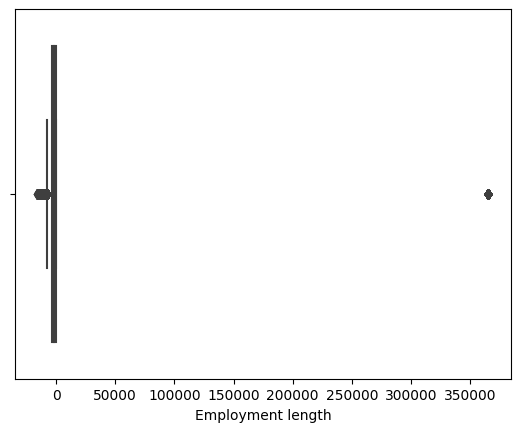

In [41]:
sns.boxplot(x=data["Employment length"])

In [199]:
y=data["Is high risk"]

In [206]:
x=data.drop(["Is high risk"],axis=1)

In [207]:
# x=data.drop(["Gender","Has a property","Has a car","Age","Marital status"],axis=1)

In [208]:
# x=data.drop(["Gender","Has a property"],axis=1)

In [209]:
x.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has an email,Account age
0,1,1,1,0,135000.0,4,4,1,5,-16271,-3111,0,0,-17.0
1,0,1,0,1,135000.0,0,1,3,1,-10130,-1651,0,0,-1.0
2,0,0,1,2,180000.0,0,4,1,1,-12821,-5657,0,0,-38.0
3,0,1,1,0,360000.0,0,1,3,1,-20929,-2046,0,1,-11.0
4,0,0,0,0,270000.0,4,4,2,1,-16207,-515,0,0,-41.0


In [210]:
data.shape

(26379, 15)

In [211]:
print(x.shape)
print(y.shape)

(26379, 14)
(26379,)


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [214]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21103, 14)
(5276, 14)
(21103,)
(5276,)


In [215]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [216]:
scalar.fit(x_train)

StandardScaler()

In [217]:
x_train=scalar.transform(x_train)

In [218]:
x_test=scalar.transform(x_test)

In [219]:
x_train

array([[-0.700232  , -0.78168984, -1.4227505 , ..., -0.53777803,
        -0.31618656,  0.48723093],
       [-0.700232  , -0.78168984,  0.70286393, ..., -0.53777803,
        -0.31618656,  1.33596374],
       [-0.700232  , -0.78168984,  0.70286393, ..., -0.53777803,
        -0.31618656, -0.72524452],
       ...,
       [-0.700232  , -0.78168984,  0.70286393, ..., -0.53777803,
        -0.31618656, -0.36150188],
       [ 1.42809811,  1.27927977,  0.70286393, ..., -0.53777803,
        -0.31618656, -0.72524452],
       [ 1.42809811,  1.27927977, -1.4227505 , ...,  1.85950327,
         3.16268982,  0.24473584]])

In [220]:
x_test

array([[-0.700232  , -0.78168984,  0.70286393, ...,  1.85950327,
        -0.31618656,  0.48723093],
       [-0.700232  ,  1.27927977, -1.4227505 , ..., -0.53777803,
        -0.31618656,  0.72972602],
       [-0.700232  ,  1.27927977, -1.4227505 , ..., -0.53777803,
        -0.31618656,  0.06286452],
       ...,
       [-0.700232  , -0.78168984,  0.70286393, ..., -0.53777803,
        -0.31618656, -0.05838302],
       [ 1.42809811,  1.27927977,  0.70286393, ..., -0.53777803,
        -0.31618656,  1.45721129],
       [-0.700232  , -0.78168984,  0.70286393, ..., -0.53777803,
        -0.31618656, -1.6346011 ]])

In [221]:
from sklearn.decomposition import PCA

In [222]:
import joblib

In [223]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # Retain 95% of variance, you can adjust this
x_pca = pca.fit_transform(x_train)
joblib.dump(pca, 'pca_compressed.joblib', compress=3)

['pca_compressed.joblib']

In [224]:
x_pca.shape

(21103, 12)

In [225]:
principle_Df = pd.DataFrame(data =x_pca)

In [226]:
print(principle_Df.head())

         0         1         2         3         4         5         6   \
0  1.134725 -1.292364  0.174012  0.955928  0.355125  0.933813 -0.192283   
1 -3.045721 -0.301980 -0.319354  0.391399  1.181536  0.743080 -0.795134   
2 -3.026694  0.328854  0.220881  0.079744 -0.973497  1.189342 -0.162114   
3  1.388361  2.095493  2.220173  1.798139 -0.352683  1.506231  0.558787   
4 -3.727233 -0.329440  0.242833 -0.378494  0.110820 -1.018809  0.906979   

         7         8         9         10        11  
0  0.602754  0.982935  0.593155  1.920614  0.629358  
1 -0.568936 -0.341953 -0.194880 -0.334150  0.268177  
2  0.253784 -0.985549 -1.483421 -0.648515  0.195986  
3 -1.174363  1.384455 -1.392203 -0.469123  0.253767  
4  0.938753  1.278345 -0.768121 -0.745048  0.281175  


In [227]:
print(principle_Df.shape)

(21103, 12)


In [228]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

# Check the original class distribution
print('Original training class distribution:', Counter(y_train))

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and resample the training data
x_res, y_res = smote.fit_resample(x_pca, y_train)

# Check the resampled class distribution
print('Resampled training class distribution:', Counter(y_res))

Original training class distribution: Counter({0: 20716, 1: 387})
Resampled training class distribution: Counter({0: 20716, 1: 20716})


In [229]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()

In [239]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'max_features': [10],
     "max_leaf_nodes":[2],
    'class_weight': [{0: 5, 1: 6}]  # Adjust as needed
 }

grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_res,y_res)

best_rf_model = grid_search.best_estimator_
# Save the best model using compression
joblib.dump(best_rf_model, 'best_rf_model_compressed.joblib', compress=3)


['best_rf_model_compressed.joblib']

In [240]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3,5,7,10],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': [10, 20, 30 , 40],
#     'min_samples_leaf': [1, 2, 4]
#  }

# grid_search = GridSearchCV(estimator=RF_model,param_grid=param_grid, cv = 3, scoring='accuracy', verbose = 3)
# grid_search.fit(x_res, y_res)

# best_rf_model = grid_search.best_estimator_


In [241]:
best_rf_model

RandomForestClassifier(class_weight={0: 5, 1: 6}, max_depth=10, max_features=10,
                       max_leaf_nodes=2, n_estimators=200)

In [242]:
# Apply the same PCA transformation on the test data
x_test_pca = pca.transform(x_test)

In [243]:
x_test_pca.shape

(5276, 12)

In [244]:
y_pred=best_rf_model.predict(x_test_pca)

In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.30      0.46      5174
           1       0.02      0.81      0.04       102

    accuracy                           0.31      5276
   macro avg       0.51      0.56      0.25      5276
weighted avg       0.97      0.31      0.45      5276



In [246]:
from sklearn.metrics import confusion_matrix


[[1553 3621]
 [  19   83]]


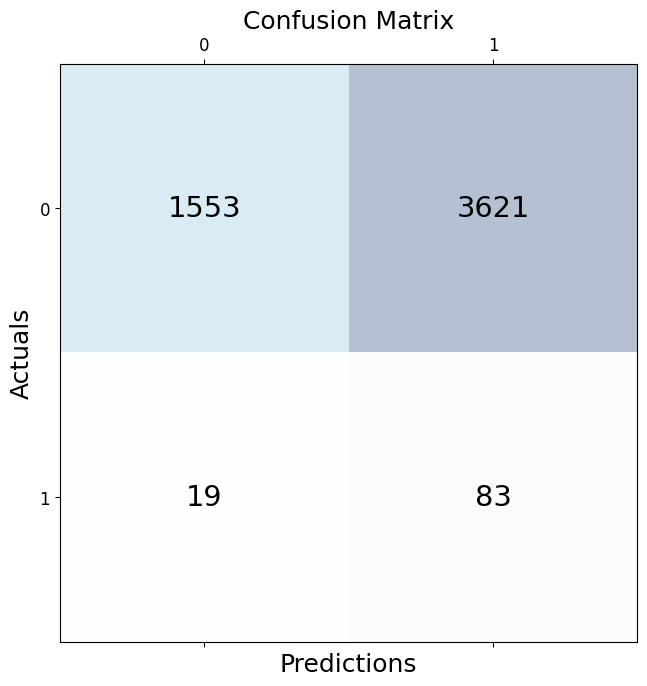

In [247]:
print(confusion_matrix(y_test,y_pred))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [248]:
from sklearn import metrics
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 31.0 %
model f1_score - : 4.36 %
model precision - : 2.24 %
model recall - : 81.4  %


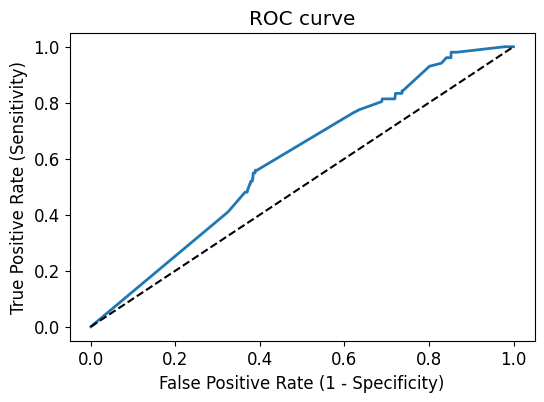

In [249]:
# plot ROC Curve
y_pred1 = best_rf_model.predict_proba(x_test_pca)[::,1]

# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [250]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5941


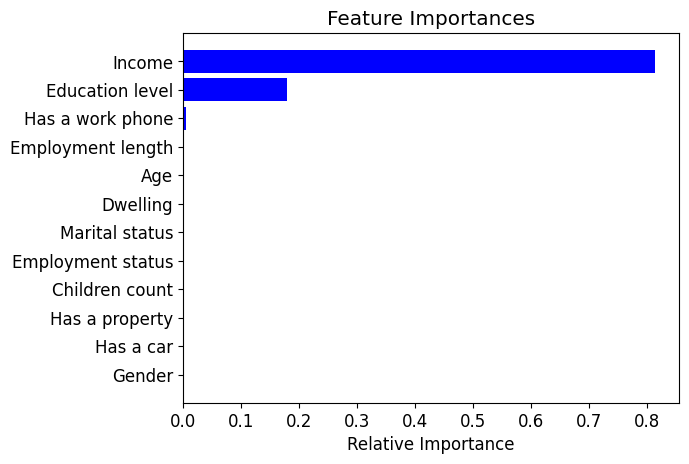

In [251]:
features = x.columns
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [252]:
test_data=pd.read_csv("/kaggle/input/risk-dataset/test (3).csv")

In [253]:
test_data.head() # show first 5 row


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [254]:
test_data.head() # show first 5 row

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [255]:
test_data.shape # (number of rows , number of columns)

(7292, 20)

In [256]:
test_data.describe() # for numerical columns

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


In [257]:
test_data.isna().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [258]:
test_data.shape

(7292, 20)

In [259]:
test_data.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [260]:
# remove columns unnecessary
test_data.drop(["ID","Has a phone","Job title"],axis=1,inplace=True)

In [261]:
test_data.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has an email,Family member count,Account age,Is high risk
0,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,1.0,-6.0,0
1,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,0,2.0,-16.0,0
2,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,1,2.0,-52.0,0
3,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,2.0,-54.0,0
4,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,2.0,-48.0,0


In [262]:
test_data.shape

(7292, 17)

In [263]:
test_data["Employment status"].value_counts()

Employment status
Working                 3763
Commercial associate    1689
Pensioner               1232
State servant            604
Student                    4
Name: count, dtype: int64

In [264]:
# remove columns unnecessary
test_data.drop(["Has a mobile phone"],axis=1,inplace=True)

In [265]:
test_data.drop_duplicates(inplace=True)

In [266]:
test_data.shape

(7110, 16)

In [267]:
categorical_features=test_data.select_dtypes(include=["object"])

In [268]:
print(categorical_features)

     Gender Has a car Has a property     Employment status  \
0         F         N              Y         State servant   
1         M         Y              N  Commercial associate   
2         F         N              N         State servant   
3         F         Y              Y  Commercial associate   
4         F         Y              N               Working   
...     ...       ...            ...                   ...   
7286      F         N              Y             Pensioner   
7288      F         Y              Y               Working   
7289      F         N              Y               Working   
7290      F         Y              N  Commercial associate   
7291      F         N              Y  Commercial associate   

                    Education level  Marital status             Dwelling  
0     Secondary / secondary special       Separated    House / apartment  
1                  Higher education         Married    House / apartment  
2                  Higher educ

In [269]:
cat_columns=['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling']

In [270]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_columns:
    test_data[col]=le.fit_transform(test_data[col])

In [271]:
test_data.drop(["Family member count"],axis=1,inplace=True)

In [272]:
numerical_features.columns

Index(['Children count', 'Income', 'Age', 'Employment length',
       'Has a work phone', 'Has an email', 'Family member count',
       'Account age', 'Is high risk'],
      dtype='object')

In [292]:
test_data.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has an email,Account age,Is high risk
0,0,0,1,0,202500.0,2,4,2,1,-16834,-1692,0,0,-6.0,0
1,1,1,0,0,675000.0,0,1,1,1,-18126,-948,0,0,-16.0,0
2,0,0,0,0,234000.0,2,1,0,1,-21967,-5215,0,1,-52.0,0
3,0,1,1,0,445500.0,0,1,1,1,-12477,-456,0,0,-54.0,0
4,0,1,0,0,225000.0,4,4,1,2,-12155,-667,0,0,-48.0,0


In [293]:
y_test_final=test_data["Is high risk"]

In [294]:
x_test_final=test_data.drop("Is high risk",axis=1)

In [295]:
# x_test_final=x_test_final.drop(["Gender","Has a property"],axis=1)

In [296]:
x_test_final.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has an email,Account age
0,0,0,1,0,202500.0,2,4,2,1,-16834,-1692,0,0,-6.0
1,1,1,0,0,675000.0,0,1,1,1,-18126,-948,0,0,-16.0
2,0,0,0,0,234000.0,2,1,0,1,-21967,-5215,0,1,-52.0
3,0,1,1,0,445500.0,0,1,1,1,-12477,-456,0,0,-54.0
4,0,1,0,0,225000.0,4,4,1,2,-12155,-667,0,0,-48.0


In [297]:
test_data.shape

(7110, 15)

In [298]:
print(x_test_final.shape)
print(y_test_final.shape)

(7110, 14)
(7110,)


In [299]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [300]:
x_test_final=scalar.fit_transform(x_test_final)

In [301]:
x_test_final

array([[-0.70397633, -0.789251  ,  0.68838986, ..., -0.54690465,
        -0.31017288,  1.22706348],
       [ 1.42050231,  1.26702405, -1.45266521, ..., -0.54690465,
        -0.31017288,  0.62285407],
       [-0.70397633, -0.789251  , -1.45266521, ..., -0.54690465,
         3.22400849, -1.5522998 ],
       ...,
       [-0.70397633, -0.789251  ,  0.68838986, ...,  1.8284723 ,
        -0.31017288,  0.0790656 ],
       [-0.70397633,  1.26702405, -1.45266521, ...,  1.8284723 ,
        -0.31017288, -1.37103698],
       [-0.70397633, -0.789251  ,  0.68838986, ..., -0.54690465,
         3.22400849, -0.58556475]])

In [302]:
y_test_final

0       0
1       0
2       0
3       0
4       0
       ..
7286    0
7288    0
7289    0
7290    0
7291    0
Name: Is high risk, Length: 7110, dtype: int64

In [303]:
from sklearn.decomposition import PCA

In [304]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # Retain 95% of variance, you can adjust this
x_pca_final = pca.fit_transform(x_test_final)

In [305]:
x_pca_final.shape

(7110, 12)

In [306]:
principle_Df_test = pd.DataFrame(data =x_pca_final)

In [307]:
print(principle_Df_test.head())

         0         1         2         3         4         5         6   \
0 -1.036065 -0.247259  0.296776  0.474135  0.591636 -1.272243 -0.503983   
1  1.291406  4.130967  0.734937 -2.332706 -0.675522  0.232229 -1.882861   
2 -0.244432  1.087800  1.855384  0.982360 -1.365663  1.693326  1.056942   
3  0.668335  2.967449  0.681776  0.248050 -1.573595  1.280084 -0.281952   
4  1.105000 -0.489004 -0.140702 -0.893799 -0.833794  0.728532  1.278712   

         7         8         9         10        11  
0  0.461608 -0.329441  0.628337  0.266209 -0.634513  
1  0.221385 -0.493196  2.269769 -0.307150  0.245951  
2 -2.701186 -0.398173  1.130818 -1.162998  0.521993  
3  0.847824 -0.823439  0.135489  0.435286 -0.825846  
4  0.223292 -0.610624  0.536173 -1.165188 -0.455747  


In [308]:
print(principle_Df_test.shape)

(7110, 12)


In [309]:
x_pca_final.shape

(7110, 12)

In [310]:
y_pred_final=best_rf_model.predict(x_pca_final)

In [311]:
from sklearn.metrics import classification_report
print(classification_report(y_test_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.30      0.46      6993
           1       0.02      0.81      0.04       117

    accuracy                           0.31      7110
   macro avg       0.50      0.56      0.25      7110
weighted avg       0.97      0.31      0.45      7110



In [312]:
from sklearn.metrics import confusion_matrix


[[1553 3621]
 [  19   83]]


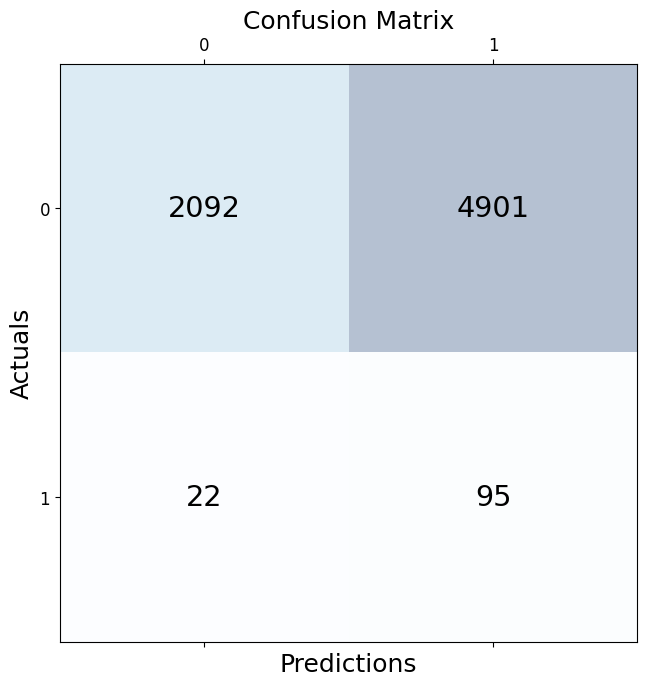

In [313]:
print(confusion_matrix(y_test,y_pred))

conf_matrix = confusion_matrix(y_true=y_test_final, y_pred=y_pred_final)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [314]:
from sklearn import metrics
accracy = metrics.accuracy_score(y_test_final, y_pred_final)
f1_score = metrics.f1_score(y_test_final, y_pred_final)
precision = metrics.precision_score(y_test_final, y_pred_final)
recall = metrics.recall_score(y_test_final, y_pred_final)

print (f'model Accuracy - : {100*accracy:.3} %')
print (f'model f1_score - : {100*f1_score:.3} %')
print (f'model precision - : {100*precision:.3} %')
print (f'model recall - : {100*recall:.3}  %')

model Accuracy - : 30.8 %
model f1_score - : 3.72 %
model precision - : 1.9 %
model recall - : 81.2  %


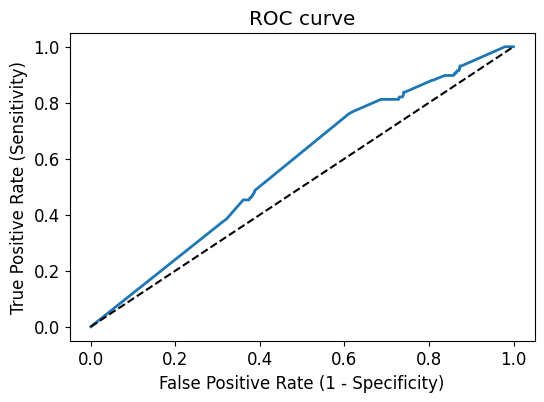

In [315]:
# plot ROC Curve
y_pred1 = best_rf_model.predict_proba(x_pca_final)[::,1]

# y_pred1 = y_pred1.reshape(-1,1)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_final, y_pred1) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [316]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_final, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5730
